### 선별 개별 종목에 대한 알맞은 비율 구성법

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pykrx import stock


### 개별 종목 머지

In [21]:
start_date = '20200101'
end_date = '20211231'
symbols = ['035420', '196170', '042700', '005930'] # Naver, 알테오젠, 한미반도체, 삼전

In [22]:
# dataFrame concat와 동일


df_stock = pd.DataFrame()
for symbol in symbols:
    df_stock[symbol] = stock.get_market_ohlcv_by_date(start_date, end_date, symbol)['종가']
df_stock

,035420,196170,042700,005930
날짜,,,,
2020-01-02,182500,19413,3980,55200
2020-01-03,181500,18746,3985,55500
2020-01-06,180500,17494,3920,55500
2020-01-07,187000,17995,3925,55800
2020-01-08,183000,16883,3925,56800
...,...,...,...,...
2021-12-24,384000,58389,18050,80500
2021-12-27,380500,59807,18300,80200
2021-12-28,384500,62809,18425,80300


In [23]:
# 데일리 수익율
daily_return = df_stock.pct_change(periods=1)
daily_return

,035420,196170,042700,005930
날짜,,,,
2020-01-02,NaN,NaN,NaN,NaN
2020-01-03,-0.005479,-0.034358,0.001256,0.005435
2020-01-06,-0.005510,-0.066788,-0.016311,0.000000
2020-01-07,0.036011,0.028638,0.001276,0.005405
2020-01-08,-0.021390,-0.061795,0.000000,0.017921
...,...,...,...,...
2021-12-24,0.015873,-0.014082,0.000000,0.007509
2021-12-27,-0.009115,0.024285,0.013850,-0.003727
2021-12-28,0.010512,0.050195,0.006831,0.001247


In [24]:
# 리스크 정수 구하기 
annual_return = daily_return.mean() * 252
annual_return

035420    0.437258
196170    0.883705
042700    0.946450
005930    0.217409
dtype: float64

In [25]:
daily_cov = daily_return.cov()
daily_cov

,035420,196170,042700,005930
035420,0.000526,0.000409,0.000260,0.000159
196170,0.000409,0.002319,0.000473,0.000185
042700,0.000260,0.000473,0.001220,0.000283
005930,0.000159,0.000185,0.000283,0.000315


In [26]:
# weight 비중

annual_cov = daily_cov * 252
annual_cov


,035420,196170,042700,005930
035420,0.132514,0.102990,0.065583,0.039966
196170,0.102990,0.584310,0.119117,0.046511
042700,0.065583,0.119117,0.307320,0.071432
005930,0.039966,0.046511,0.071432,0.079495


### 비율 생성과 정규화


In [27]:
import numpy as np

weights = np.random.random(len(symbols)) # 비율 랜덤생성기
# weights, type(weights), weights.shape

In [28]:
weights = weights /  np.sum(weights)
weights, type(weights), np.sum(weights)

(array([0.30645029, 0.28619165, 0.25927227, 0.1480858 ]),
 numpy.ndarray,
 0.9999999999999999)

In [32]:
returnOfRate = np.dot(weights, annual_return)
returnOfRate, type(returnOfRate)
risk = np.sqrt(np.dot(weights.T, np.dot(annual_cov, weights)))

(0.6644902927211062, numpy.float64)

In [33]:
np.dot(annual_cov, weights)

array([0.09300589, 0.23655723, 0.14444593, 0.05585092])

In [34]:
np.dot(weights.T, np.dot(annual_cov, weights))

0.141923936700747

In [35]:
# 여러 포트폴리오 비율 적용

portfolio_returnOfRate = list()
portfolio_risks = list()
portfolio_weights = list()


for number in range(200):

    weights = np.random.random(len(symbols)) # 비율 랜덤생성기
    weights = weights /  np.sum(weights)
    returnOfRate = np.dot(weights, annual_return)
    risk = np.sqrt(np.dot(weights.T, np.dot(annual_cov, weights)))


    portfolio_weights.append(weights)
    portfolio_returnOfRate.append(returnOfRate)
    portfolio_risks.append(risk)

In [37]:
# Convert DataFrame : Return Of Rate, Risk, Weights
portfolio = {"ReturnOfRate": portfolio_returnOfRate,
            "Risk" : portfolio_risks}

for idx, symbol in enumerate(symbols):
    portfolio[symbol] = [weight[idx] for weight in portfolio_weights]

    pass

df_portfolio = pd.DataFrame(portfolio)
df_portfolio.head(3)

,ReturnOfRate,Risk,035420,196170,042700,005930
0,0.620371,0.337822,0.264294,0.129858,0.354347,0.251501
1,0.676116,0.377418,0.273888,0.275879,0.294463,0.155770
2,0.673690,0.379857,0.115908,0.279650,0.335330,0.269112


In [39]:
df_portfolio[['ReturnOfRate', 'Risk']]

,ReturnOfRate,Risk
0,0.620371,0.337822
1,0.676116,0.377418
2,0.673690,0.379857
3,0.692248,0.438815
4,0.737581,0.420755
...,...,...
195,0.594769,0.350642
196,0.617669,0.372732
197,0.524481,0.363383
198,0.547849,0.383101


In [41]:
df_portfolio[['035420','196170','042700','005930']]

,035420,196170,042700,005930
0,0.264294,0.129858,0.354347,0.251501
1,0.273888,0.275879,0.294463,0.155770
2,0.115908,0.279650,0.335330,0.269112
3,0.346940,0.433257,0.150729,0.069074
4,0.079745,0.352932,0.366897,0.200427
...,...,...,...,...
195,0.352440,0.259576,0.174093,0.213890
196,0.228679,0.324391,0.183591,0.263339
197,0.185315,0.351543,0.044028,0.419113
198,0.195839,0.388062,0.039533,0.376566


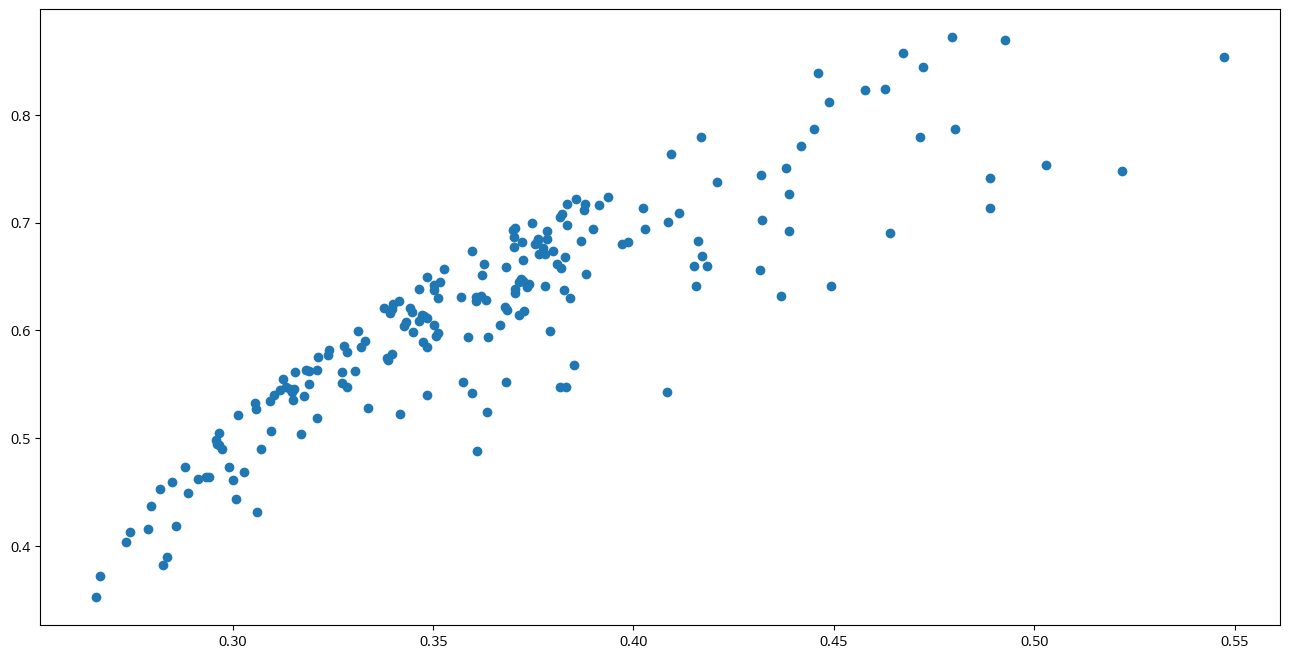

In [42]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,8))
plt.scatter(x=df_portfolio['Risk'], y=df_portfolio['ReturnOfRate'])
plt.show()